<a href="https://colab.research.google.com/github/maxgoldberg25/Stock-Prediction/blob/main/Stock_Price_Prediction_Model_(Python_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: Artificial recurrent neural network (Long Short Memory) that predicts stock price (tsla) using the past 60 day stock price.


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader
pandas_datareader.__version__


'0.10.0'

In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Getting the stock quote
df = web.DataReader('AAPL', data_source ='yahoo', start='2012-01-01', end='2022-8-22')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607434
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747407
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880663
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2022-08-16,173.710007,171.660004,172.779999,173.029999,56377100.0,173.029999
2022-08-17,176.149994,172.570007,172.770004,174.550003,79542000.0,174.550003
2022-08-18,174.899994,173.119995,173.750000,174.149994,62290100.0,174.149994


In [ ]:
#Num of rows/cols in data set
df.shape

(2677, 6)

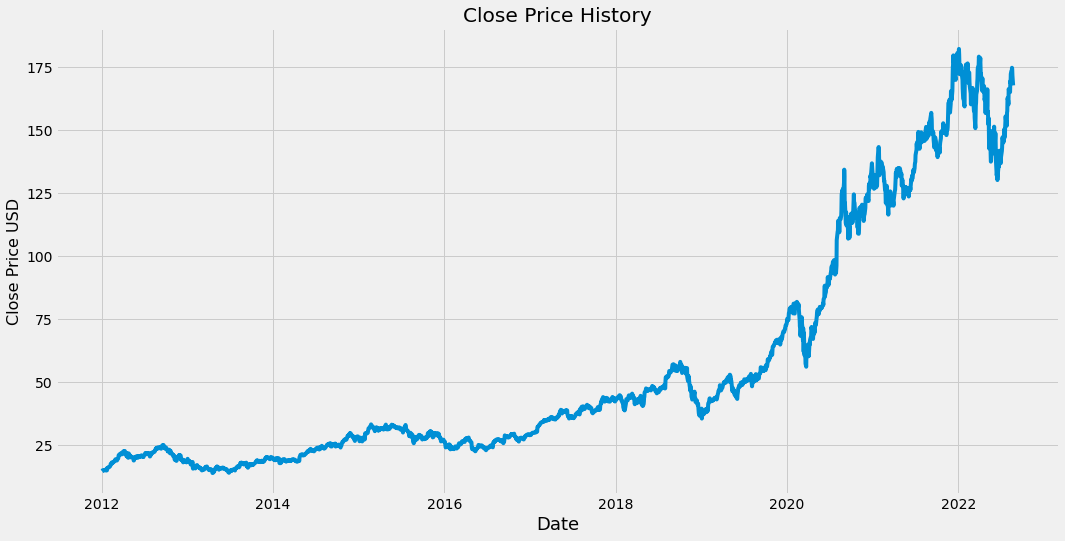

In [ ]:
#Closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=16)
plt.show()

In [ ]:
#Close col
data = df.filter(['Close'])
# --> numpy array
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

2142

In [ ]:
#Scaling data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.95323168],
       [0.9375828 ],
       [0.91407966]])

In [ ]:
#Creating scaled training data set
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


In [ ]:
#Converting both training data sets to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2082, 60, 1)

In [ ]:
#Build the LSTM model, model's architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compiling model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Train model
model.fit(x_train, y_train,batch_size=1,epochs=1)

2082/2082 [==============================] - 79s 33ms/step - loss: 3.3012e-04


In [ ]:
#Testing data set
test_data = scaled_data[training_data_len - 60: , :]
#Data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Converting data to numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.8439512163679175

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


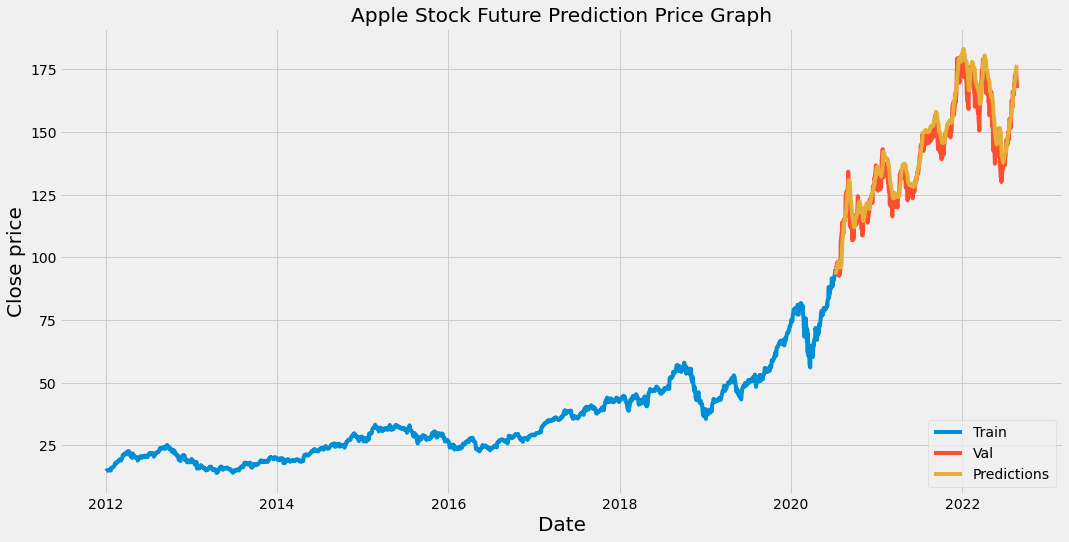

In [ ]:
#Plotting data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Apple Stock Future Prediction Price Graph')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close price', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', "Predictions"]])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()